# 시각화

`uv add matplotlib seaborn`

## 1. 데이터 불러오기

In [2]:
import pandas as pd
data = pd.read_csv("data\\sample_data.csv", encoding="utf-8")
data.head()

# 시계열 범주형 범주형 순서형 연속형 연속형 이산형 이산형

,날짜,성별,지역,만족도,평균 체류 시간(분),월 수입(만원),방문 페이지 수,자녀 수
0,2024-01-01,남,대전,상,40.4,193.0,3,0
1,2024-01-02,여,대전,중,34.8,288.0,2,2
2,2024-01-03,남,서울,하,57.2,274.0,8,0
3,2024-01-04,남,대전,중,45.1,329.0,7,1
4,2024-01-05,남,서울,상,23.8,341.0,4,0


## 2. 시각화

#### 폰트에 대해서

`uv add koreanize-matplotlib`

In [3]:
from matplotlib import font_manager

search_font = "gothic"

for font in font_manager. findSystemFonts():
    font_info = font_manager. FontProperties (fname=font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name. lower():
        print(font_name, font_path)

Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
NanumGothic C:\Windows\Fonts\BOLD.TTF
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Franklin Gothic Medium Cond C:\Windows\Fonts\FRAMDCN.TTF
Copperplate Gothic Bold C:\Windows\Fonts\COPRGTB.TTF
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Malgun Gothic C:\Windows\Fonts\malgun.ttf
Franklin Gothic Medium C:\Windows\Fonts\framd.ttf
NanumGothic C:\Windows\Fonts\.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
MS Gothic C:\Windows\Fonts\msgothic.ttc
Yu Gothic C:\Windows\Fonts\YuGothM.ttc

In [4]:
# 폰트 등록하기
from matplotlib import font_manager

## 폰트 경로
font_path = "C:\\Windows\\Fonts\\FRABKIT.TTF"
## 폰트 추가
font_manager.fontManager.addfont(font_path)
## 폰트 이름 확인
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)

Franklin Gothic Book


In [5]:
import matplotlib.pyplot as plt

# 폰트 설정하기
font_name = "NanumGothic"

# 폰트 설정
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus' ] = False

# 마이너스 부호 깨짐 방지

Text(0.5, 1.0, '성별에 대한 막대그래프')

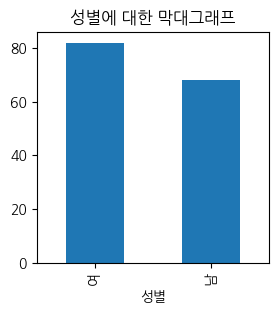

In [6]:
import matplotlib.pyplot as plt
# seaborn 없이 그리기

plt.figure(figsize=(3,3))
gender_data = data["성별"].value_counts()
gender_data.plot(kind="bar")
plt.title("성별에 대한 막대그래프")
# plt.show()

### 1) 범주형 데이터

<Axes: xlabel='성별', ylabel='count'>

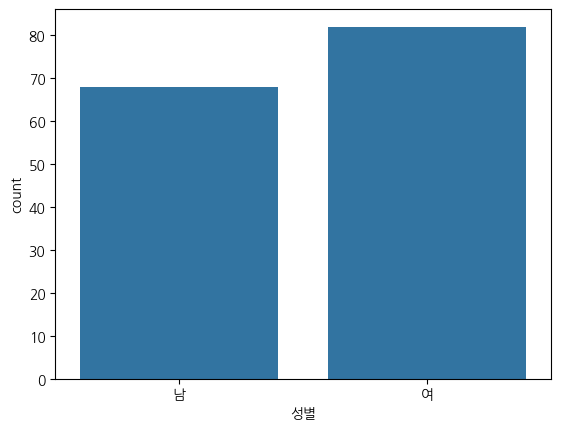

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

sns.countplot(data=data, x="성별")

### 2) 순서형 데이터

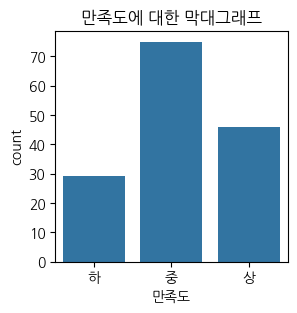

In [8]:
# 만족도에 대한 막대 그래프를 그려주세요

plt.figure(figsize=(3,3))
sns.countplot(data=data, x="만족도", order=['하', '중', '상'])
plt.title("만족도에 대한 막대그래프")
plt.show()

<Axes: xlabel='만족도', ylabel='count'>

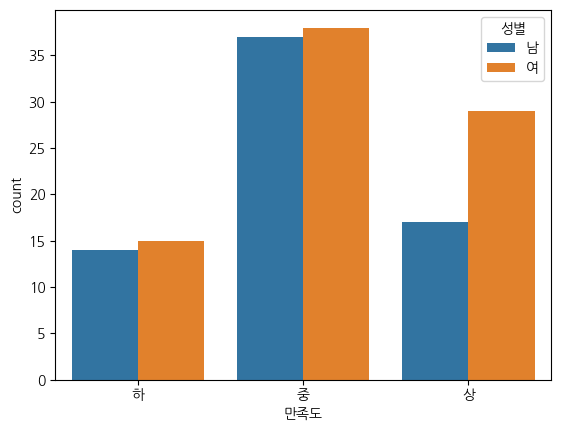

In [9]:
# 성별에 따른 만족도 막대그래프를 그려주세요
sns.countplot(data=data, x='만족도', order=['하', '중', '상'], hue='성별') 
# hue : 특정 컬럼의 값을 기준으로 그룹을 나누고 싶을때

### 3) 연속형 데이터

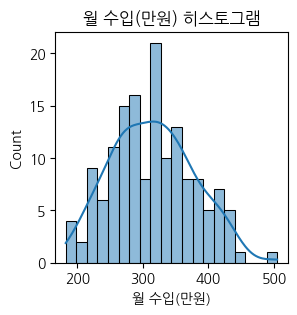

In [11]:
# 월 수입(만원) 열에 대한 히스토그램
plt.figure(figsize=(3,3))
# plt.hist(data["월 수입(만원)"], bins=15, edgecolor="black")
sns.histplot(data=data, x="월 수입(만원)", bins=20, kde=True)
plt.title("월 수입(만원) 히스토그램")
plt.show()

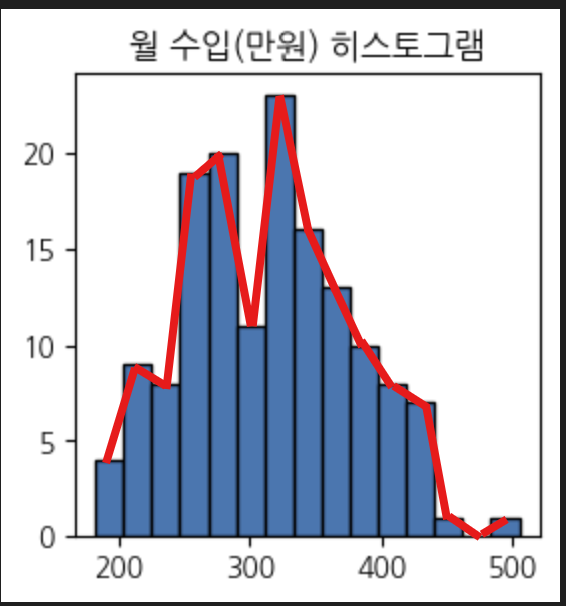

히스토그램/박스플롯 시각화를 통해 분포,이상치를 확인한다

- 첨도가 높은 분포의 경우 : 이상치 제거
- 양의 왜도 분포의 경우 : 전처리 과정 필요

등 필요한 전처리 과정을 판단할 수 있음

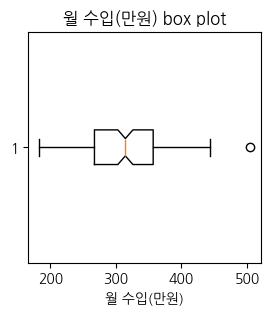

In [ ]:
# 월 수입(만원) 열에 대한 히스토그램
plt.figure(figsize=(3,3))
plt.boxplot(data["월 수입(만원)"], orientation="horizontal", notch=True)
plt.xlabel("월 수입(만원)")
plt.title("월 수입(만원) box plot")
plt.show()

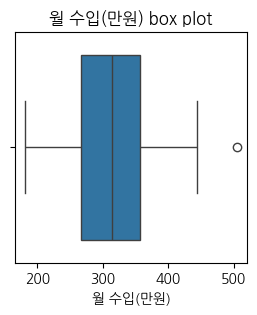

In [ ]:
plt.figure(figsize=(3,3))
sns.boxplot(data=data, x="월 수입(만원)") # 가로
# sns.boxplot(data=data, y="월 수입(만원)") # 세로
plt.xlabel("월 수입(만원)")
plt.title("월 수입(만원) box plot")
plt.show()

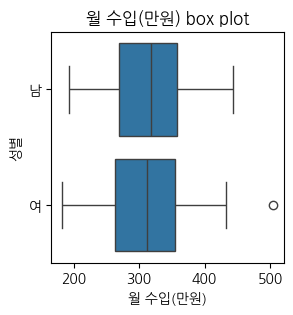

In [ ]:
plt.figure(figsize=(3,3))
sns.boxplot(data=data, x="월 수입(만원)", y="성별")
plt.xlabel("월 수입(만원)")
plt.title("월 수입(만원) box plot")
plt.show()

### 4) 이산형 데이터

Text(0.5, 1.0, '방문 페이지 수 막대그래프')

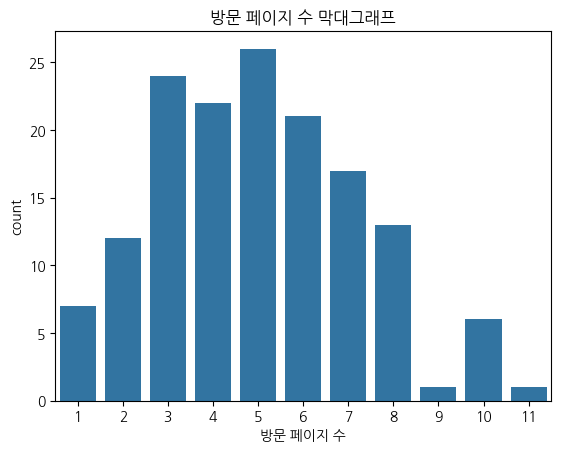

In [ ]:
# 방문 페이지 수

fig, ax = plt.subplots()

sns.countplot(data=data, x="방문 페이지 수", ax=ax)
ax.set_title("방문 페이지 수 막대그래프")

### 5) 시계열 데이터

- 날짜 데이터타입 : `datetime`

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   날짜           150 non-null    object 
 1   성별           150 non-null    object 
 2   지역           150 non-null    object 
 3   만족도          150 non-null    object 
 4   평균 체류 시간(분)  150 non-null    float64
 5   월 수입(만원)     150 non-null    float64
 6   방문 페이지 수     150 non-null    int64  
 7   자녀 수         150 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 9.5+ KB


날짜 데이터의 데이터 타입 변경 방법

In [ ]:
data["날짜"] = pd.to_datetime(data["날짜"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           150 non-null    datetime64[ns]
 1   성별           150 non-null    object        
 2   지역           150 non-null    object        
 3   만족도          150 non-null    object        
 4   평균 체류 시간(분)  150 non-null    float64       
 5   월 수입(만원)     150 non-null    float64       
 6   방문 페이지 수     150 non-null    int64         
 7   자녀 수         150 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 9.5+ KB


In [ ]:
data = pd.read_csv("data/sample_data.csv", parse_dates=["날짜"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           150 non-null    datetime64[ns]
 1   성별           150 non-null    object        
 2   지역           150 non-null    object        
 3   만족도          150 non-null    object        
 4   평균 체류 시간(분)  150 non-null    float64       
 5   월 수입(만원)     150 non-null    float64       
 6   방문 페이지 수     150 non-null    int64         
 7   자녀 수         150 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 9.5+ KB


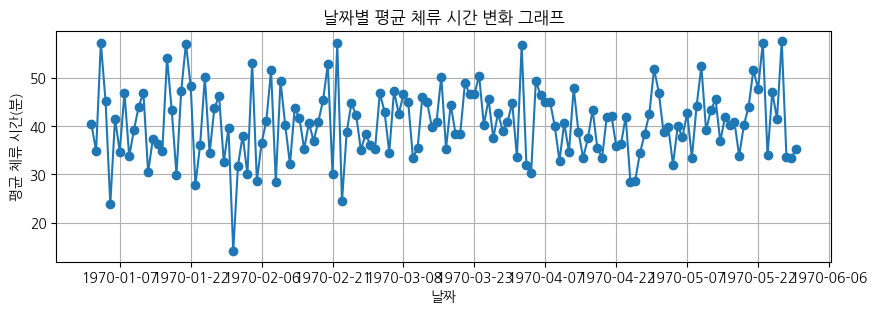

In [12]:
fig, ax = plt.subplots(figsize = (10,3))
ax.plot(data["날짜"], data["평균 체류 시간(분)"], marker="o")
ax.set_title("날짜별 평균 체류 시간 변화 그래프")
ax.set_xlabel("날짜")
ax.set_ylabel("평균 체류 시간(분)")
plt.grid()

import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 하루 간격으로 표시
plt.show()

In [ ]:
data[["날짜", "평균 체류 시간(분)"]]

,날짜,평균 체류 시간(분)
0,2024-01-01,40.4
1,2024-01-02,34.8
2,2024-01-03,57.2
3,2024-01-04,45.1
4,2024-01-05,23.8
...,...,...
145,2024-05-25,41.5
146,2024-05-26,57.5
147,2024-05-27,33.5
148,2024-05-28,33.3


## subplots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

(<Figure size 300x300 with 1 Axes>, <Axes: >)

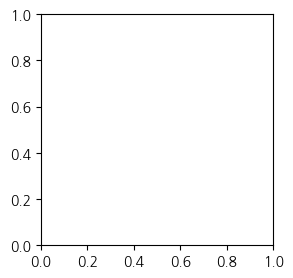

In [ ]:
plt.subplots(figsize=(3,3))

(<Figure size 1000x300 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

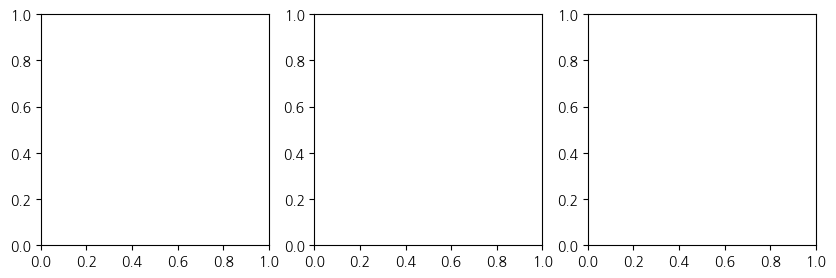

In [ ]:
plt.subplots(1, 3, figsize=(10,3))

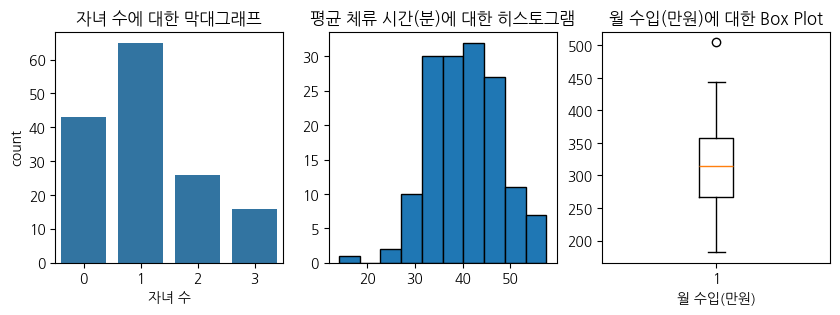

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10,3))
# 첫번째 그래프: 자녀 수에 대한 막대 그래프
sns.countplot(data=data, x="자녀 수", ax=ax[0])
ax[0].set_title("자녀 수에 대한 막대그래프")
# 두번째 그래프: 평균 체류 시간(분)에 대한 히스토그램
ax[1].hist(data["평균 체류 시간(분)"], edgecolor="black")
ax[1].set_title("평균 체류 시간(분)에 대한 히스토그램")
# 세번째 그래프: 월 수입(만원)에 대한 상자그림
ax[2].boxplot(x=data["월 수입(만원)"])
ax[2].set_title("월 수입(만원)에 대한 Box Plot")
ax[2].set_xlabel("월 수입(만원)")
plt.show()